In [105]:
import re
import os
import numpy as np
from nltk.corpus import stopwords
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import pandas as pd
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snowf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df = pd.read_csv('Game_of_Thrones_Script.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Release Date   23911 non-null  object
 1   Season         23911 non-null  object
 2   Episode        23911 non-null  object
 3   Episode Title  23911 non-null  object
 4   Name           23908 non-null  object
 5   Sentence       23911 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [37]:
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [38]:
df['Name'].unique()

array(['waymar royce', 'will', 'gared', 'royce', 'jon snow',
       'septa mordane', 'sansa stark', 'eddard stark', 'robb stark',
       'jonrobb', 'cassel', 'catelyn stark', 'bran stark',
       'theon greyjoy', 'jaime lannister', 'cersei lannister',
       'maester luwin', 'luwin', 'arya stark', 'robert baratheon',
       'tyrion lannister', 'ros', 'viserys', 'daenerys targaryen', 'maid',
       'illyrio', 'benjen', 'a voice', 'jorah mormont', 'khal drogo',
       'sandor clegane', 'doreah', 'irri', 'viserys targaryen',
       'joffrey lannister', 'myrcella baratheon', 'benjen stark',
       'assassin', 'jhiqui', 'rodrick cassel', 'mycah', 'soldier',
       'jory cassel', 'kings landing guard', 'varys', 'renly baratheon',
       'petyr baelish', 'grand maester pycelle', 'old nan', 'guard',
       'alliser thorne', 'jeor mormont', 'grenn', 'pyp', 'rast',
       'barristan selmy', 'lancel lannister', 'rakharo', 'yoren',
       'rhakaro', 'maester aemon', 'syrio forel', 'sam tarly',
   

In [39]:
df=df[df['Name']=='eddard stark']

In [40]:
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
20,2011-04-17,Season 1,Episode 1,Winter is Coming,eddard stark,And which one of you was a marksman at ten? Ke...
25,2011-04-17,Season 1,Episode 1,Winter is Coming,eddard stark,Get the lads to saddle their horses.
27,2011-04-17,Season 1,Episode 1,Winter is Coming,eddard stark,"He swore an oath, Cat."
29,2011-04-17,Season 1,Episode 1,Winter is Coming,eddard stark,"Tell Bran he's coming, too."
31,2011-04-17,Season 1,Episode 1,Winter is Coming,eddard stark,He won't be a boy forever. And winter is coming.


In [41]:
sentences = []

for word in df['Sentence']:
    sentences.append(word)

lines = []

for line in sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [67]:
# set stop words (using nltk)
stops = set(stopwords.words('english'))

# add some additional custom stop words
# make sure they are all in lower case
additional_stops = {'ve',"know","got","going", 'want',"know", "think","’", "’", "“", "”", "'s", "n't", "'m", "'re", "'ll", "rt", "i.e", "amp", "do", "hey"}
stops.update(additional_stops)

words = []

for word in lines:
    # remove mentions
    word = re.sub('@[^\s]+', '', word)
    # remove URLs
    word = re.sub(r've\S+', '', word)
    # remove stop words
    words.extend([word for word in TextBlob(word).words if word.lower() not in stops])

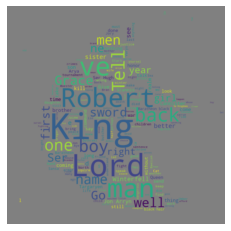

In [119]:
mask = np.array(Image.open("nedstark.png"))

wordcloud = WordCloud(colormap='viridis',         # you can choose other matplotlib colormaps
                      background_color='gray', max_words=200,
                      mask = np.array(Image.open("nedstark.png")))
                     
# generate the word cloud
wordcloud = wordcloud.generate(' '.join(words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [116]:
wordcloud = wordcloud.to_file('nedpic3.png')